In [204]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [205]:
#reading csv file
df = pd.read_csv('Credit_risk_data.csv')
df.head()

,age,sex,job,saving_accounts,checking_account,credit_amount,duration,purpose,marital_status,education_level,...,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default,loan_eligibility
0,56.0,female,skilled,little,moderate,46062.0,41.0,domestic appliances,married,graduate,...,0.0,4.0,0.0,466.0,0.03,car,10.58,vehicle,bad,not eligible
1,69.0,female,skilled,moderate,little,3463.0,NaN,other,married,phd,...,1.0,7.0,0.0,734.0,0.00,business,5.84,guarantor,bad,not eligible
2,46.0,male,unskilled,moderate,moderate,27924.0,9.0,other,divorced,high school,...,0.0,4.0,0.0,310.0,0.02,education,6.63,none,bad,not eligible
3,32.0,NaN,unskilled,moderate,moderate,15003.0,70.0,business,married,graduate,...,0.0,NaN,0.0,682.0,0.02,mortgage,16.43,none,bad,not eligible
4,60.0,male,self-employed,little,little,3542.0,45.0,other,divorced,high school,...,0.0,7.0,0.0,773.0,0.00,personal,16.80,property,bad,not eligible


In [206]:
df.shape

(3000, 23)

In [207]:
df.dtypes

age                      float64
sex                       object
job                       object
saving_accounts           object
checking_account          object
credit_amount            float64
duration                 float64
purpose                   object
marital_status            object
education_level           object
number_of_dependents     float64
income                   float64
employment_status         object
existing_loans_count     float64
credit_history_length    float64
previous_defaults        float64
credit_score             float64
installment_rate         float64
loan_type                 object
interest_rate            float64
collateral                object
default                   object
loan_eligibility          object
dtype: object

In [208]:
df["age"].describe()

count    2838.000000
mean       43.570472
std        14.947039
min        18.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

In [209]:
#To see the value count of target variable
df["default"].value_counts()

default
bad     2715
good     285
Name: count, dtype: int64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2838 non-null   float64
 1   sex                    2868 non-null   object 
 2   job                    2838 non-null   object 
 3   saving_accounts        2861 non-null   object 
 4   checking_account       2866 non-null   object 
 5   credit_amount          2840 non-null   float64
 6   duration               2842 non-null   float64
 7   purpose                2854 non-null   object 
 8   marital_status         2830 non-null   object 
 9   education_level        2844 non-null   object 
 10  number_of_dependents   2861 non-null   float64
 11  income                 2828 non-null   float64
 12  employment_status      2855 non-null   object 
 13  existing_loans_count   2850 non-null   float64
 14  credit_history_length  2854 non-null   float64
 15  prev

In [211]:
#to see the description of all columns in detail
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2838.0,NaN,NaN,NaN,43.570472,14.947039,18.0,31.0,44.0,56.0,69.0
sex,2868,2,male,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,2838,4,skilled,1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saving_accounts,2861,4,little,1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
checking_account,2866,3,little,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,2840.0,NaN,NaN,NaN,25099.652465,14310.64078,518.0,13024.75,24686.0,37483.0,49985.0
duration,2842.0,NaN,NaN,NaN,38.57741,19.058345,6.0,22.0,39.0,55.0,71.0
purpose,2854,8,repairs,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,2830,4,married,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,2844,4,graduate,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df.isna().sum()

age                      162
sex                      132
job                      162
saving_accounts          139
checking_account         134
credit_amount            160
duration                 158
purpose                  146
marital_status           170
education_level          156
number_of_dependents     139
income                   172
employment_status        145
existing_loans_count     150
credit_history_length    146
previous_defaults        137
credit_score             138
installment_rate         149
loan_type                163
interest_rate            161
collateral               132
default                    0
loan_eligibility           0
dtype: int64

In [213]:
#To see if there are any duplicated rows
df.duplicated().sum()

0

In [214]:
df["previous_defaults"].value_counts()

previous_defaults
0.0    2461
1.0     402
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'credit_amount'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'existing_loans_count'}>,
        <Axes: title={'center': 'interest_rate'}>]], dtype=object)

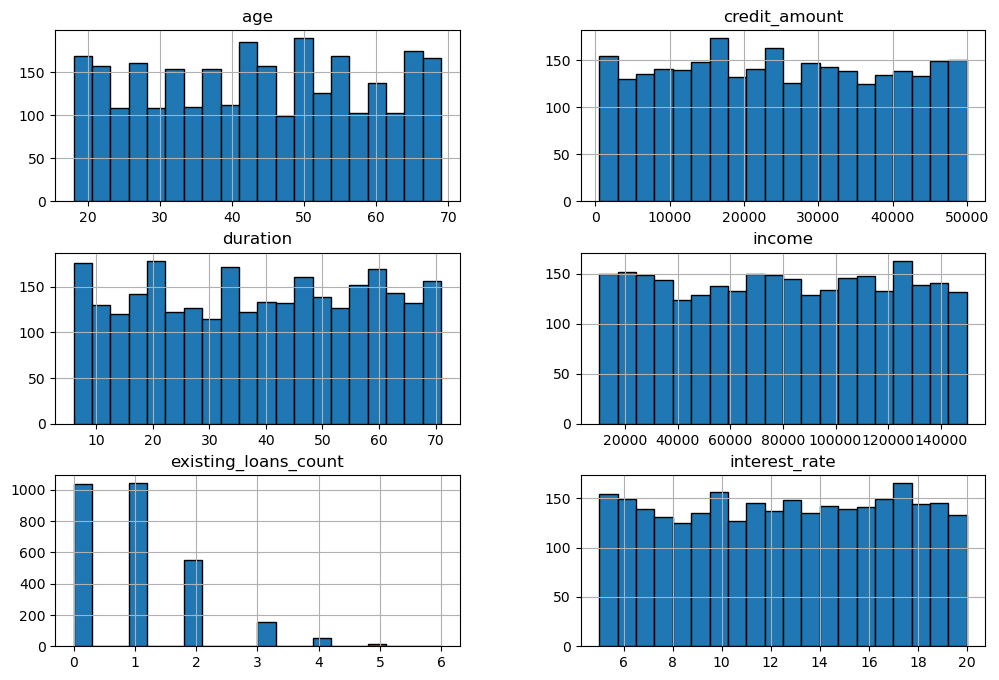

In [215]:
#To see the Skewness and are their any outliers 
df[["age","credit_amount","duration","income","existing_loans_count","interest_rate"]].hist(
    bins=20, edgecolor="black", figsize=(12, 8)
)


In [216]:
# Dealing with Na values
# Using Mean for age, credit_amount, duration, income and interest_rate as they are roughly symmetric
# Using median for existing_loans_count as it has skewed distribution
# Using Mode for categorical data: job, marital_status, education_level and loan_type
# Droping the purpose column as it is same as loan_type
#Droping loan_eligibilty column as it contains leakage/derived info, drop column
#Droping rows with Na values from rest of the columns


array([[<Axes: title={'center': 'age'}>]], dtype=object)

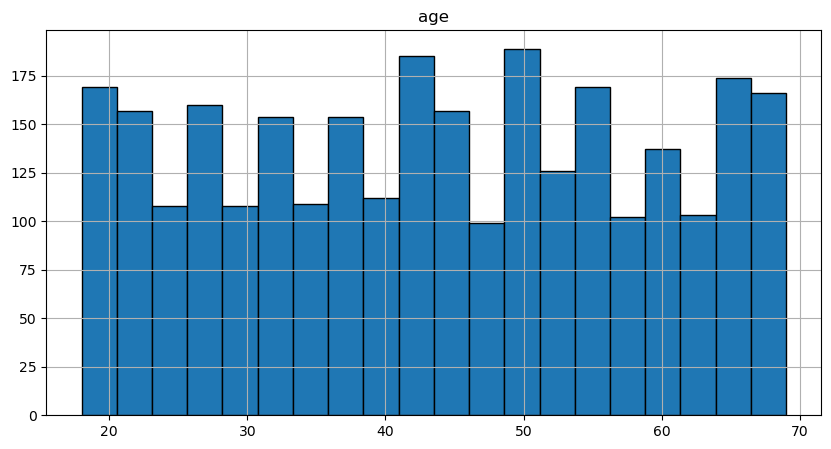

In [217]:
#To see the Skewness and are their any outliers 
df[["age"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [218]:
#age(numeric): Fill missing values with mean
mean_age = df['age'].mean()
mean_age

43.57047216349542

In [219]:
df['age'] = df['age'].fillna(mean_age)

array([[<Axes: title={'center': 'credit_amount'}>]], dtype=object)

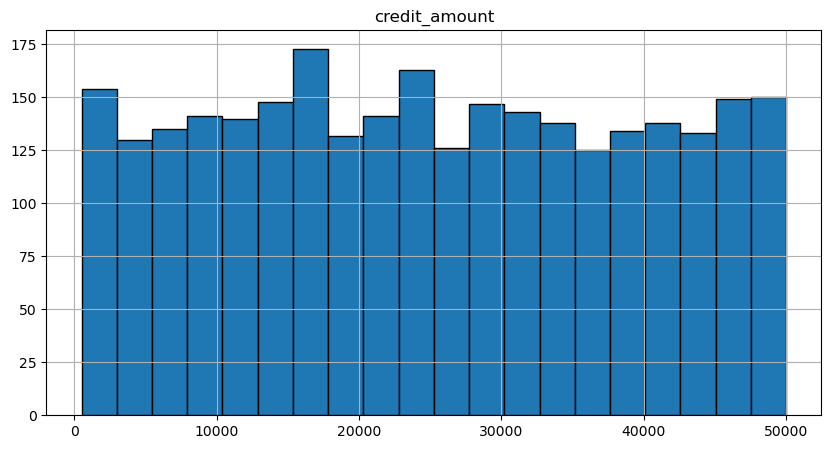

In [220]:
#To see the Skewness and are their any outliers 
df[["credit_amount"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [221]:
#credit_amount(numeric): Fill missing values with mean
mean_credit_amount = df['credit_amount'].mean()
mean_credit_amount

25099.65246478873

In [222]:
df['credit_amount'] = df['credit_amount'].fillna(mean_credit_amount)

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

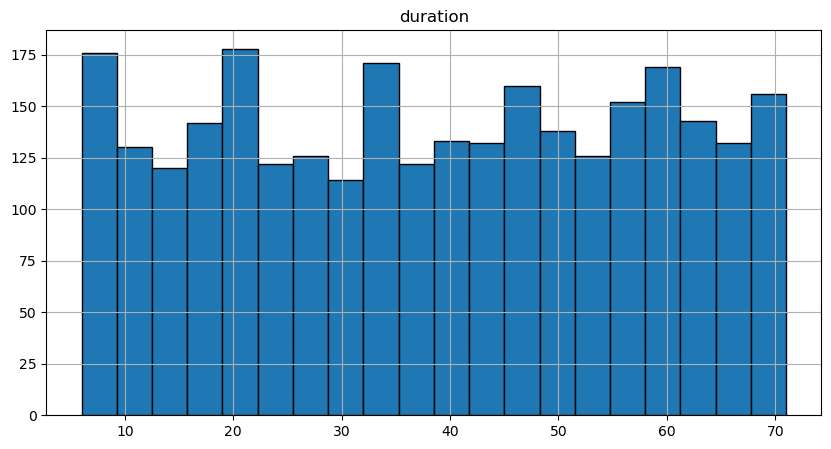

In [223]:
#To see the Skewness and are their any outliers 
df[["duration"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [224]:
#duration(numeric): Fill missing values with mean
mean_duration = df['duration'].mean()
mean_duration

38.57741027445461

In [225]:
df['duration'] = df['duration'].fillna(mean_duration)

array([[<Axes: title={'center': 'income'}>]], dtype=object)

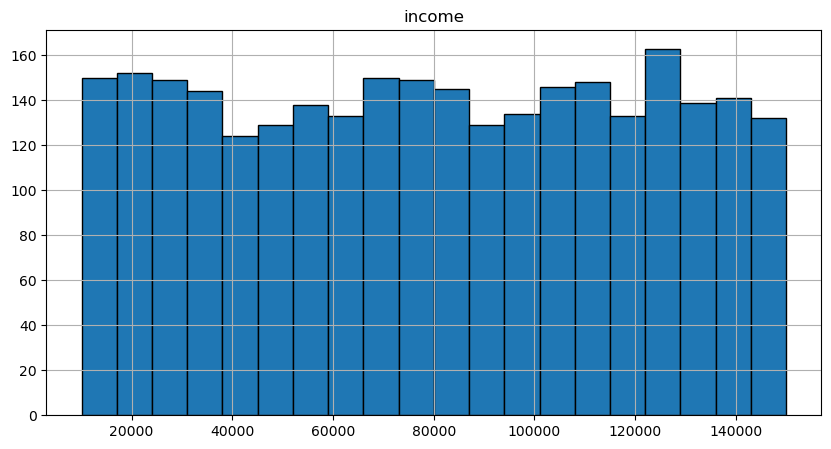

In [226]:
#To see the Skewness and are their any outliers 
df[["income"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [227]:
#income(numeric): Fill missing values with mean
mean_income = df['income'].mean()
mean_income

79809.71888260255

In [228]:
df['income'] = df['income'].fillna(mean_income)

array([[<Axes: title={'center': 'interest_rate'}>]], dtype=object)

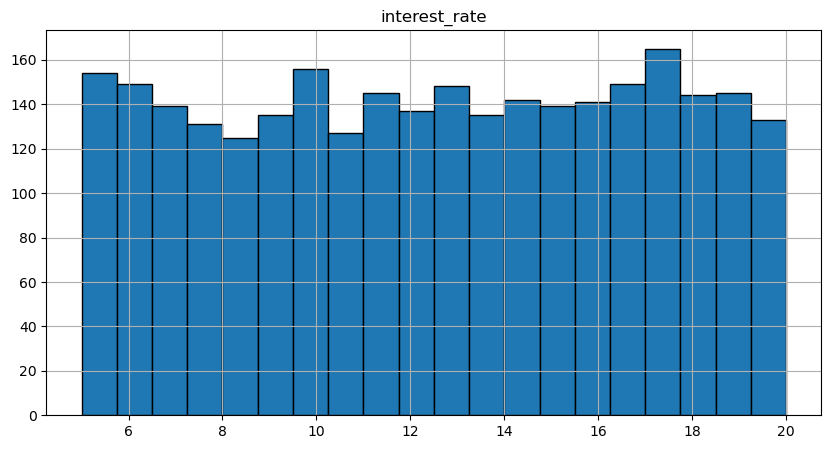

In [229]:
#To see the Skewness and are their any outliers 
df[["interest_rate"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [230]:
#interest_rate(numeric): Fill missing values with mean
mean_interest_rate = df['interest_rate'].mean()
mean_interest_rate

12.537562522014793

In [231]:
df['interest_rate'] = df['interest_rate'].fillna(mean_interest_rate)

array([[<Axes: title={'center': 'existing_loans_count'}>]], dtype=object)

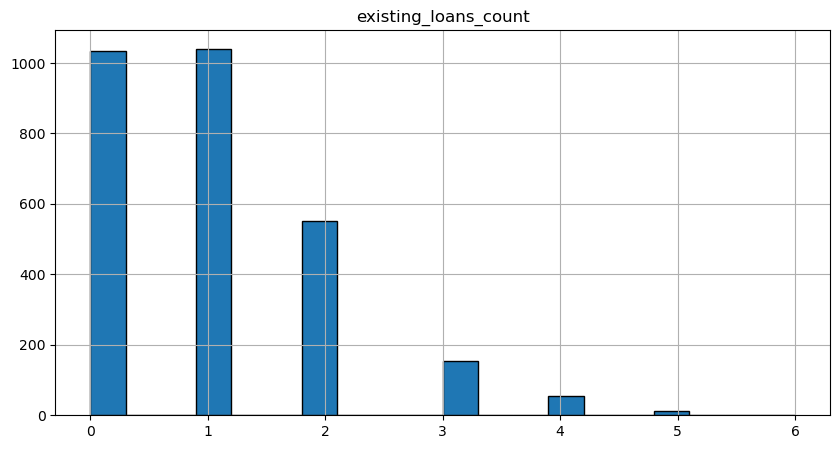

In [232]:
#To see the Skewness and are their any outliers 
df[["existing_loans_count"]].hist(
    bins=20, edgecolor="black", figsize=(10, 5)
)

In [233]:
#existing_loans_count(numeric): Fill missing values with medianS
mean_existing_loans_count = df['existing_loans_count'].median()
mean_existing_loans_count

1.0

In [234]:
df['existing_loans_count'] = df['existing_loans_count'].fillna(mean_existing_loans_count)

In [235]:
#job(categorical): Fill missing values with Mode
mode_job=df['job'].mode()[0]
mode_job

'skilled'

In [236]:
df['job'] = df['job'].fillna(mode_job)

In [237]:
#marital_status(categorical): Fill missing values with Mode
mode_marital_status=df['marital_status'].mode()[0]
mode_marital_status

'married'

In [238]:
df['marital_status'] = df['marital_status'].fillna(mode_marital_status)

In [239]:
#education_level(categorical): Fill missing values with Mode
mode_education_level=df['education_level'].mode()[0]
mode_education_level

'graduate'

In [240]:
df['education_level'] = df['education_level'].fillna(mode_education_level)

In [241]:
#loan_type(categorical): Fill missing values with Mode
mode_loan_type=df['loan_type'].mode()[0]
mode_loan_type

'education'

In [242]:
df['loan_type'] = df['loan_type'].fillna(mode_loan_type)

In [243]:
# Droping the purpose column as it is same as loan_type
df.drop(columns=['purpose'], inplace=True)


In [244]:
#Contains leakage/derived info, drop column
df.drop(columns=['loan_eligibility'], inplace=True)

In [245]:
df.isna().sum()

age                        0
sex                      132
job                        0
saving_accounts          139
checking_account         134
credit_amount              0
duration                   0
marital_status             0
education_level            0
number_of_dependents     139
income                     0
employment_status        145
existing_loans_count       0
credit_history_length    146
previous_defaults        137
credit_score             138
installment_rate         149
loan_type                  0
interest_rate              0
collateral               132
default                    0
dtype: int64

In [246]:
df.shape

(3000, 21)

In [247]:
#Droping rows with Na values from rest of the columns
df= df.dropna()

In [248]:
df.isna().sum()

age                      0
sex                      0
job                      0
saving_accounts          0
checking_account         0
credit_amount            0
duration                 0
marital_status           0
education_level          0
number_of_dependents     0
income                   0
employment_status        0
existing_loans_count     0
credit_history_length    0
previous_defaults        0
credit_score             0
installment_rate         0
loan_type                0
interest_rate            0
collateral               0
default                  0
dtype: int64

In [249]:
df.shape

(1880, 21)

In [250]:
#The shape of the data set has changed and the count of null values have become zero

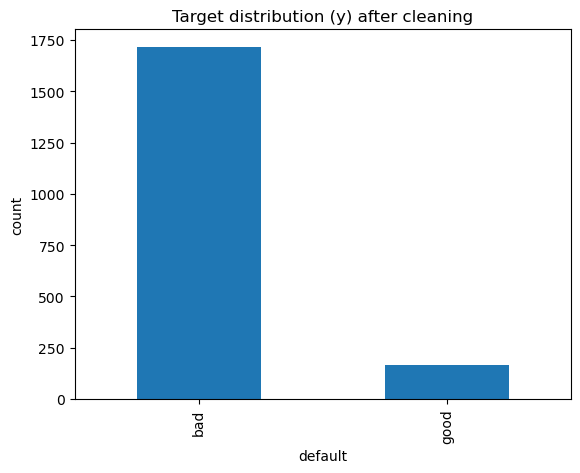

In [251]:
#Optional sanity check visuals (kept minimal)
import matplotlib.pyplot as plt

plt.figure()
df['default'].value_counts().plot(kind='bar')
plt.title("Target distribution (y) after cleaning")
plt.xlabel("default")
plt.ylabel("count")
plt.show()

In [252]:
# Data transformation
# using Label Encoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column == 'default':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [253]:
df

,age,sex,job,saving_accounts,checking_account,credit_amount,duration,marital_status,education_level,number_of_dependents,...,employment_status,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default
0,56.000000,female,skilled,little,moderate,46062.0,41.00000,married,graduate,1.0,...,self-employed,0.0,4.0,0.0,466.0,0.03,car,10.58,vehicle,0
1,69.000000,female,skilled,moderate,little,3463.0,38.57741,married,phd,1.0,...,employed,1.0,7.0,0.0,734.0,0.00,business,5.84,guarantor,0
2,46.000000,male,unskilled,moderate,moderate,27924.0,9.00000,divorced,high school,1.0,...,employed,0.0,4.0,0.0,310.0,0.02,education,6.63,none,0
4,60.000000,male,self-employed,little,little,3542.0,45.00000,divorced,high school,0.0,...,retired,0.0,7.0,0.0,773.0,0.00,personal,16.80,property,0
5,25.000000,female,self-employed,little,moderate,30741.0,42.00000,single,graduate,1.0,...,retired,0.0,0.0,0.0,808.0,0.01,mortgage,19.82,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,63.000000,female,management,moderate,moderate,2502.0,41.00000,divorced,phd,1.0,...,employed,1.0,26.0,1.0,448.0,0.00,car,17.26,none,1
2994,43.570472,male,skilled,quite rich,little,17123.0,43.00000,married,graduate,2.0,...,employed,0.0,19.0,0.0,300.0,0.00,business,12.53,none,0
2996,52.000000,male,unskilled,little,little,49193.0,52.00000,divorced,graduate,0.0,...,employed,2.0,12.0,0.0,817.0,0.01,business,5.13,none,0
2998,47.000000,male,skilled,little,moderate,13207.0,56.00000,single,high school,1.0,...,employed,2.0,14.0,0.0,445.0,0.00,mortgage,16.19,none,0


In [254]:
#Using Label Encoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column == 'sex':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [255]:
df

,age,sex,job,saving_accounts,checking_account,credit_amount,duration,marital_status,education_level,number_of_dependents,...,employment_status,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default
0,56.000000,0,skilled,little,moderate,46062.0,41.00000,married,graduate,1.0,...,self-employed,0.0,4.0,0.0,466.0,0.03,car,10.58,vehicle,0
1,69.000000,0,skilled,moderate,little,3463.0,38.57741,married,phd,1.0,...,employed,1.0,7.0,0.0,734.0,0.00,business,5.84,guarantor,0
2,46.000000,1,unskilled,moderate,moderate,27924.0,9.00000,divorced,high school,1.0,...,employed,0.0,4.0,0.0,310.0,0.02,education,6.63,none,0
4,60.000000,1,self-employed,little,little,3542.0,45.00000,divorced,high school,0.0,...,retired,0.0,7.0,0.0,773.0,0.00,personal,16.80,property,0
5,25.000000,0,self-employed,little,moderate,30741.0,42.00000,single,graduate,1.0,...,retired,0.0,0.0,0.0,808.0,0.01,mortgage,19.82,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,63.000000,0,management,moderate,moderate,2502.0,41.00000,divorced,phd,1.0,...,employed,1.0,26.0,1.0,448.0,0.00,car,17.26,none,1
2994,43.570472,1,skilled,quite rich,little,17123.0,43.00000,married,graduate,2.0,...,employed,0.0,19.0,0.0,300.0,0.00,business,12.53,none,0
2996,52.000000,1,unskilled,little,little,49193.0,52.00000,divorced,graduate,0.0,...,employed,2.0,12.0,0.0,817.0,0.01,business,5.13,none,0
2998,47.000000,1,skilled,little,moderate,13207.0,56.00000,single,high school,1.0,...,employed,2.0,14.0,0.0,445.0,0.00,mortgage,16.19,none,0


In [256]:
#Using One-hot encoder
X_raw = df.drop(columns= ['default'])
Y= df['default']
X= pd.get_dummies(X_raw,drop_first = True)

X= pd.get_dummies(X).astype(int) # makes combination ex. female + all clomns, male + all columns (1x 10 for male and female both)
X.head()

,age,sex,credit_amount,duration,number_of_dependents,income,existing_loans_count,credit_history_length,previous_defaults,credit_score,...,employment_status_retired,employment_status_self-employed,employment_status_unemployed,loan_type_car,loan_type_education,loan_type_mortgage,loan_type_personal,collateral_none,collateral_property,collateral_vehicle
0,56,0,46062,41,1,33134,0,4,0,466,...,0,1,0,1,0,0,0,0,0,1
1,69,0,3463,38,1,40505,1,7,0,734,...,0,0,0,0,0,0,0,0,0,0
2,46,1,27924,9,1,125250,0,4,0,310,...,0,0,0,0,1,0,0,1,0,0
4,60,1,3542,45,0,81097,0,7,0,773,...,1,0,0,0,0,0,1,0,1,0
5,25,0,30741,42,1,65197,0,0,0,808,...,1,0,0,0,0,1,0,1,0,0


In [257]:
Y.head()

0    0
1    0
2    0
4    0
5    0
Name: default, dtype: int32

In [258]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

# Choose only numeric predictor columns (example list below, adapt to your column names)
numeric_cols = ['age', 'credit_amount', 'duration', 'number_of_dependents', 'income',
            'existing_loans_count', 'credit_history_length', 'previous_defaults',
            'credit_score', 'installment_rate', 'interest_rate']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])




In [259]:
X[numeric_cols].round(2)

,age,credit_amount,duration,number_of_dependents,income,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,interest_rate
0,0.88,1.51,0.12,0.05,-1.20,-1.03,-1.20,-0.41,-0.69,0.0,-0.46
1,1.77,-1.53,-0.04,0.05,-1.01,-0.01,-0.86,-0.41,1.03,0.0,-1.64
2,0.20,0.22,-1.61,0.05,1.16,-1.03,-1.20,-0.41,-1.69,0.0,-1.40
4,1.16,-1.52,0.34,-1.00,0.03,-1.03,-0.86,-0.41,1.28,0.0,0.96
5,-1.24,0.42,0.17,0.05,-0.38,-1.03,-1.66,-0.41,1.51,0.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...
2993,1.36,-1.60,0.12,0.05,0.38,-0.01,1.33,2.45,-0.81,0.0,1.20
2994,-0.01,-0.55,0.23,1.10,0.96,-1.03,0.52,-0.41,-1.76,0.0,0.02
2996,0.61,1.74,0.71,-1.00,1.23,1.01,-0.28,-0.41,1.57,0.0,-1.64
2998,0.27,-0.83,0.93,0.05,-0.44,1.01,-0.05,-0.41,-0.82,0.0,0.96


In [260]:
# Optional: check output
print(X[numeric_cols].describe().round(2))

           age  credit_amount  duration  number_of_dependents   income  \
count  1880.00        1880.00   1880.00               1880.00  1880.00   
mean     -0.00           0.00     -0.00                 -0.00    -0.00   
std       1.00           1.00      1.00                  1.00     1.00   
min      -1.72          -1.74     -1.77                 -1.00    -1.79   
25%      -0.90          -0.84     -0.85                 -1.00    -0.83   
50%      -0.01           0.02     -0.04                  0.05    -0.00   
75%       0.81           0.85      0.88                  0.05     0.84   
max       1.77           1.79      1.74                  5.28     1.79   

       existing_loans_count  credit_history_length  previous_defaults  \
count               1880.00                1880.00            1880.00   
mean                   0.00                  -0.00              -0.00   
std                    1.00                   1.00               1.00   
min                   -1.03              

In [261]:
from sklearn.model_selection import train_test_split

# Split into train and test sets with stratification to preserve class balance
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


### Logistic Regression Model

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score

# Initialize logistic regression with higher max_iter to ensure convergence
logreg = LogisticRegression(max_iter=2000, class_weight='balanced', solver='saga')

# Fit on training data
logreg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,2000
,multi_class,'deprecated'


In [326]:
# Predict on test data
Y_pred = logreg.predict(X_test)

In [328]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [334]:
# Evaluate accuracy, Confusion Matrix, classification report, ROC AUC
print("Accuracy:", accuracy_score(Y_test, Y_pred))


Accuracy: 0.9361702127659575


In [340]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
 [[319  24]
 [  0  33]]


In [338]:
print(classification_report(Y_test, Y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.930     0.964       343
           1      0.579     1.000     0.733        33

    accuracy                          0.936       376
   macro avg      0.789     0.965     0.849       376
weighted avg      0.963     0.936     0.944       376



In [344]:
print("ROC AUC Score:", roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1]))

ROC AUC Score: 0.9898400918809082


### Hyperparameter Tuning

In [346]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'], 
    'max_iter': [2000]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Perform grid search on training data
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}


In [352]:
# Evaluate the best estimator on the test set
best_logreg = grid_search.best_estimator_
Y_best_pred = best_logreg.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(Y_test, Y_best_pred))
print(classification_report(Y_test, Y_best_pred, digits=3))
print("Tuned Model ROC AUC:", roc_auc_score(Y_test, best_logreg.predict_proba(X_test)[:,1]))

Tuned Model Accuracy: 0.9468085106382979
              precision    recall  f1-score   support

           0      1.000     0.942     0.970       343
           1      0.623     1.000     0.767        33

    accuracy                          0.947       376
   macro avg      0.811     0.971     0.869       376
weighted avg      0.967     0.947     0.952       376

Tuned Model ROC AUC: 0.9916953794504815


### Compare Train vs. Test Performance

In [360]:
Y_pred_train = logreg.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Train Accuracy: 0.930186170212766


In [362]:
from sklearn.metrics import accuracy_score

# Get predictions for both train and test sets
Y_pred_train = logreg.predict(X_train)
Y_best_pred = best_logreg.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_best_pred)

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Determine generalization status
if abs(train_accuracy - test_accuracy) < 0.05:
    print("✅ Good generalization (similar accuracies)")
elif train_accuracy > test_accuracy + 0.1:
    print("⚠️ Overfitting detected (train >> test). Solutions:")
    print("- Add regularization (e.g., LogisticRegression(penalty='l2', C=0.1))")
    print("- Reduce features (select top features using RFE or feature_importances_)")
    print("- Increase training data or use cross-validation")
else:
    print("❓ Check model or data (unexpected gap)")

Train Accuracy: 0.930
Test Accuracy: 0.947
✅ Good generalization (similar accuracies)
